## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

# [作業目標]
- 仿造範例的MAE函數, 自己寫一個MSE函數(參考上面公式)

# [作業重點]
- 注意程式的縮排
- 是否能將數學公式, 轉換為 Python 的函式組合? (In[2], Out[2])

In [1]:
# 載入基礎套件與代稱
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 定義 mean_squared_error 這個函數, 計算並傳回 MSE
def mean_squared_error(y, yp):
    mse = sum( (y - yp)**2 ) / len(y)
    return mse



Note:
math.pow 好像不支援二個一維矩陣 element wise 的運算。
以下的寫法是失敗的:
mse = sum( math.pow((y - yp),2) ) / len(y)
會跑出以下訊息:
TypeError: only size-1 arrays can be converted to Python scalars

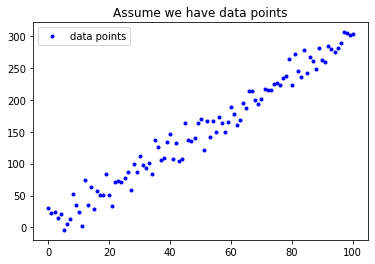

In [4]:
# 與範例相同, 不另外解說
w = 3
b = 0.5
x_lin = np.linspace(0, 100, 101)
y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

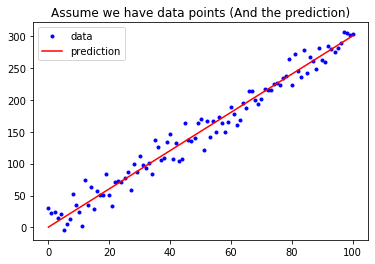

In [5]:
# 與範例相同, 不另外解說
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [6]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 237.984
The Mean absolute error is 12.234


# [作業2]

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

1. 你選的這組資料為何重要

2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

3. 蒐集而來的資料型態為何

4. 這組資料想解決的問題如何評估


選擇的競賽: Open Images 2019 - Object Detection

1. 競賽的目標在於將影像中的物件辨識出來並分類。
   重要性在於：
   (1) 將影像中的物件辨識出來可能會有助於相機應用程式拍照後製處理，可以針對物件銳利化或模糊化。
   (2) 將可能透過拍照來統計物件的數量，可能可以應用在空拍機或是街道，計算車流、人潮等等..

2. 資料的提供者為Google。
   資料取得的方式為Google依據"CC BY 2.0"的規範，從"CC BY"合作平台上取得他人分享的影像。
   Google再將這些影像進行分類標註，而註解符合"CC BY 4.0"的授權規範。

3. 蒐集來的資料型態為一張張有著註解(annotation)的影像，一張影像上可能有不只一個註解。

4. 提供的方法的好壞會透過計算"mean Average Precision(mAP)來評估"，會考慮各個分類的判斷精確度。


# [作業3]

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

3. 蒐集而來的資料型態為何

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)


回答：
1. 我們無法決定哪個客人會去哪裡，但是我們可以統計出在現在這個時段，有多少人從哪些地點搭乘車隊。
   我想出的提升業績的方法，是將車隊的車於載客後集中在特定幾個集合點等候，
   如果在此時段，城市的有二三個區域特別多人搭乘，則在這些區域分別設定集合點，
   讓車隊的車載完客人後，去距離最近的集合點等候，
   當有人叫車時，可以在較快的時間內趕到，減少車輛四處遊走反而需要多花時間去接下個客人。
   不同的時段集合點也會跟著更改，可能以小時為單位更換。

2. 資料蒐集方式為，在車上裝設定位系統，紀錄車子的行走路線，使用額外的系統紀錄車輛為"載客中"或為"移動中"。

3. 資料會有三個參數：上車時間、上車地點的X座標、上車地點的Y座標

4. 評估車輛的"載客中"的時間是否有增加，"移動中"的時間是否有減少。(不考慮起始價錢的狀況下)